In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.preprocessing import StandardScaler ,LabelEncoder
import seaborn as sns

In [2]:
missing_values=["?",np.nan,' ?']

In [3]:
df=pd.read_csv("adult.csv",header=None,na_values=missing_values)

In [4]:
df.columns=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','target']

In [5]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
target               0
dtype: int64

In [6]:
def clean(data):
    for col in data:
        df[col].fillna(method='ffill', inplace=True)
        
clean(df)        

In [7]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
target            0
dtype: int64

In [8]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [9]:
df['target'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [16]:
king=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country','target']

In [17]:
le = LabelEncoder()
for col in king:
    if df[col].dtype == 'object':  # Check if the column is of object type (categorical)
        df[col] = le.fit_transform(df[col])

In [18]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,257302,7,12,2,12,5,4,0,0,0,38,38,0
32557,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,1
32558,58,3,151910,11,9,6,0,4,4,0,0,0,40,38,0
32559,22,3,201490,11,9,4,0,3,4,1,0,0,20,38,0


## Error Handeling

In [20]:
from scipy.stats import zscore
# Calculate Z-score for each column
z_scores = df.apply(zscore)

# Define threshold for outlier detection
threshold = 3  # You can adjust this threshold based on your requirement

# Identify outliers based on threshold
outliers_df = df[(z_scores > threshold) | (z_scores < -threshold)]

# Delete outliers for each column
cleaned_df = df[~((z_scores > threshold) | (z_scores < -threshold)).any(axis=1)]


In [22]:
df.shape

(32561, 15)

In [23]:
df=cleaned_df

In [24]:
df.shape

(27762, 15)

Correlation with the Target:
age               0.241791
workclass        -0.009723
fnlwgt           -0.011534
education         0.070969
education-num     0.319833
marital-status   -0.193968
occupation        0.041834
relationship     -0.247754
race              0.094503
sex               0.211613
capital-gain      0.342728
capital-loss     -0.016554
hours-per-week    0.233037
native-country    0.045284
Name: target, dtype: float64



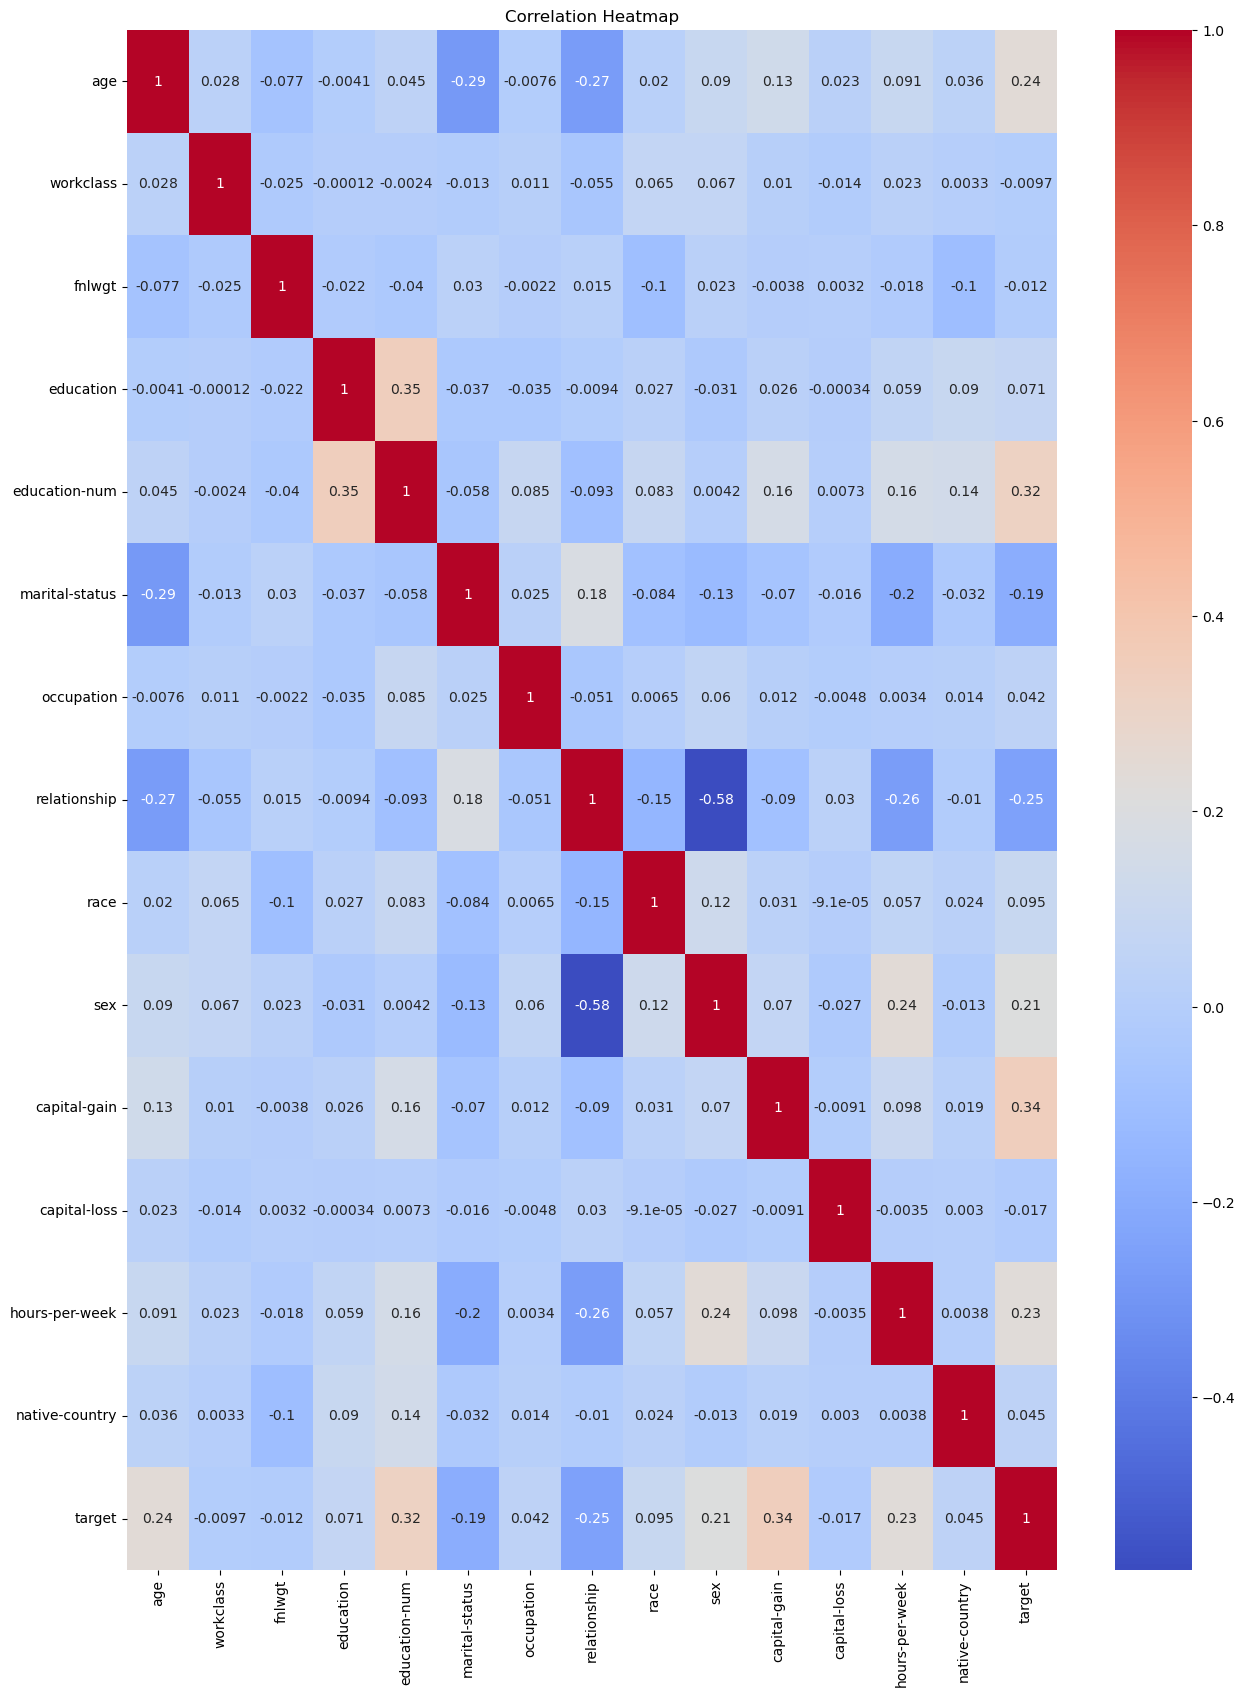

In [27]:

import matplotlib.pyplot as plt
import seaborn as sns
# Compute correlations between features and target
correlations = df.corr()['target'].drop('target')

# Print correlations
print("Correlation with the Target:")
print(correlations)
print()

# Plot correlation heatmap
plt.figure(figsize=(15, 20))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## DataTransformation

In [26]:
x=df.drop(['target'],axis=1)
y=df['target']

In [28]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
5,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,257302,7,12,2,12,5,4,0,0,0,38,38,0
32557,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,1
32558,58,3,151910,11,9,6,0,4,4,0,0,0,40,38,0
32559,22,3,201490,11,9,4,0,3,4,1,0,0,20,38,0


In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [30]:
scaler=StandardScaler();
x_train=scaler.fit_transform(x_train);
x_test=scaler.transform(x_test)

##  Logistic regression

In [31]:
regressor=LogisticRegression()

In [32]:
regressor.fit(x_train,y_train)

LogisticRegression()

In [33]:
y_pread=regressor.predict(x_test)

In [34]:
print(classification_report(y_test,y_pread))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      6439
           1       0.72      0.42      0.53      1890

    accuracy                           0.83      8329
   macro avg       0.79      0.69      0.71      8329
weighted avg       0.82      0.83      0.81      8329



In [36]:
# print(accuracy_score(y_test,y_pread))

In [ ]:
# # print(confusion_matrix(y_test,y_pread))
# tn,fp,fn,tp = confusion_matrix(y_test,y_pread).ravel()

In [ ]:
# print(tn,fp,fn,tp)

In [ ]:
# a=accuracy_score(y_test,y_pread)
# # accuracy =  (TP + TN) / (TP + TN + FP + FN)
# a

In [ ]:
# e=1-a
# e

In [ ]:
# precision_score(y_test, y_pread)
# # precision = TP / (TP + FP)

In [ ]:
# recall_score(y_test, y_pread)
# # recall = TP / (TP + FN)

In [ ]:
# # f1_Score = 2 * (precision * recall) / (precision + recall)
# f1_score(y_test,y_pread)

In [ ]:
# le = LabelEncoder()
# for col in king:
#     if df[col].dtype == 'object':  # Check if the column is of object type (categorical)
#         df[col] = le.fit_transform(df[col])

## Naive

In [37]:
n_model=GaussianNB();


In [38]:
n_model.fit(x_train,y_train);
y_pred=n_model.predict(x_test)

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85      6439
           1       0.51      0.76      0.61      1890

    accuracy                           0.78      8329
   macro avg       0.72      0.77      0.73      8329
weighted avg       0.83      0.78      0.79      8329

